## Full MNIST dataset for digit image classification
Simple approach using high-level fast.ai.

In [3]:
from fastai.vision.all import *

### Load training and validation data

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
train_path = path/'training'
fnames = get_image_files(train_path)
dls = ImageDataLoaders.from_path_func(train_path, fnames, parent_label)

In [6]:
dls.vocab, len(dls.vocab)

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 10)

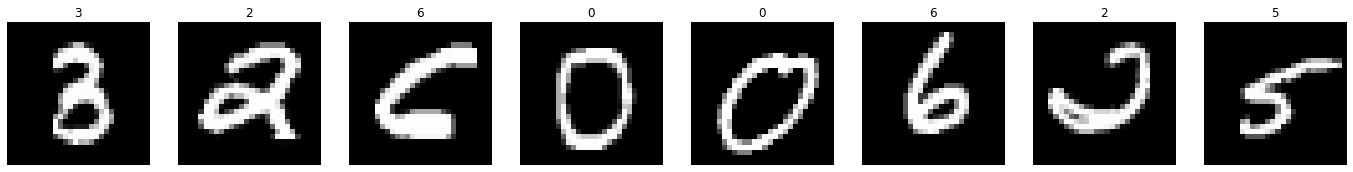

In [7]:
dls.show_batch(max_n=8, nrows=1)

### Prepare test data

In [8]:
a5 = PILImage.create((path/'testing'/'5').ls()[0])
a5

In [9]:
a7 = PILImage.create((path/'testing'/'7').ls()[0])
a7

### Train model

In [10]:
learn = cnn_learner(dls, resnet18, pretrained=False, metrics=accuracy)
learn.fit_one_cycle(4, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,1.182541,0.799846,0.921583,00:32
1,0.875212,257.741882,0.916583,00:30
2,0.156140,0.138075,0.983500,00:30
3,0.048494,0.032242,0.990750,00:30


In [11]:
learn.dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

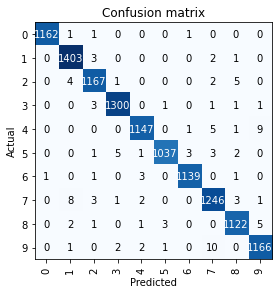

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Test model

In [13]:
learn.predict(a5)

('5',
 tensor(5),
 tensor([7.0083e-09, 5.0544e-08, 2.1783e-08, 1.7215e-06, 5.5376e-07, 9.9998e-01,
         3.0466e-06, 1.4024e-07, 4.2069e-06, 9.2329e-06]))

In [14]:
learn.predict(a7)

('7',
 tensor(7),
 tensor([9.7484e-11, 1.8725e-09, 1.3967e-08, 3.1543e-09, 1.0251e-08, 5.3367e-10,
         2.2440e-11, 1.0000e+00, 1.8926e-11, 1.5570e-08]))

### Export model

In [15]:
learn.export()

Use [classify.py](classify.py) to use the exported model.